# DEVELOPMENT OF DISSERTATION TOPIC GENERATOR FOR M.S.C STUDENTS USING MACHINE LEARNING

In [2]:
# LOADING LIBRARY
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import gensim
from gensim import corpora
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.lda_model

import spacy
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity


import pyLDAvis
import pyLDAvis.lda_model

pyLDAvis.lda_model.prepare


<function pyLDAvis.lda_model.prepare(lda_model, dtm, vectorizer, **kwargs)>

In [3]:

# Load CSV and Excel files
data1 = pd.read_csv("Primary_data.csv")
data2 = pd.read_csv("Primary_data1.csv")
file_path = 'C:/Users/Lightified/Desktop/MSC/data (Autosaved).xlsx'
sheet_name = 'Sheet2'
data3 = pd.read_excel(file_path, sheet_name=sheet_name)

# Combine the data from all sources
primary_data = pd.concat([data1, data2, data3], ignore_index=True)

# Drop irrelevant columns
primary_data = primary_data.drop(columns=['Unnamed: 0', 'Responsibilities', 'Career Goals', 'Preferred Job Title'])

# Combine columns to form new structure
primary_data['Academic Background'] = primary_data['Previous Degrees Program']
primary_data['Work Experience'] = primary_data['Job Title']

# Combine potential thesis topics into a single column
primary_data['Potential Thesis Topics'] = primary_data['Potential Thesis Topic 1'].fillna('') + ' / ' + primary_data['Potential Thesis Topic 2'].fillna('')

# Drop the original columns that have been combined
primary_data = primary_data.drop(columns=['Current Degree Program', 'Previous Degrees Program', 'Job Title', 'Potential Thesis Topic 1', 'Potential Thesis Topic 2'])

# Clean up the final DataFrame by removing unnecessary separators if any topics are missing
primary_data['Potential Thesis Topics'] = primary_data['Potential Thesis Topics'].str.strip(' / ')
primary_data = primary_data.drop(columns=['Potential Thesis Topics', 'Student ID'])

# Function to remove degree prefixes
def remove_degree_prefixes(program):
    # Define a regular expression pattern to match and remove degree prefixes
    pattern = r'(B.A in |B.Tech in |B.Sc in |Ph.D. in |Bachelor of Arts in |Master of Science in |Bachelor of Engineering in |Bachelor|Master|Ph\.?D|B\.Tech|B\.Sc|B\.S\.C|BSC|M\.Sc|B\.A)\.?|Master of Science in|Bachelor of Science in|Bachelor of Engineering in| of Science in| of Engineering in|in  | in  in '
    return re.sub(pattern, '', program, flags=re.IGNORECASE)

# Apply the function to remove degree prefixes from 'Academic Background' column
primary_data['Academic Background'] = primary_data['Academic Background'].apply(remove_degree_prefixes)

# Combine all columns into a single column
primary_data['Combined'] = primary_data.apply(lambda row: ' | '.join(row.values.astype(str)), axis=1)


# Drop rows where the number of missing values is more than 2

primary_data.dropna(inplace=True)

# Copy the cleaned DataFrame to a new variable if needed
df_primary = primary_data.copy()



In [4]:
df_primary.head()

,Interests,Description of Social Activities,Preferred Industry,Academic Background,Work Experience,Combined
0,Internet of Things (IoT),Member of the cybersecurity club,Technology,Data Analytics,Cybersecurity Specialist,Internet of Things (IoT) | Member of the cyber...
1,Internet of Things (IoT),Leading a software development team,minning,Computer Science,Software Developer,Internet of Things (IoT) | Leading a software ...
2,Software Engineering,Volunteering at local coding clubs,Technology,Software Engineering,Machine Learning Engineer,Software Engineering | Volunteering at local c...
3,Software Engineering,Leading a software development team,Education,Cybersecurity,Machine Learning Engineer,Software Engineering | Leading a software deve...
4,Internet of Things (IoT),Organizing IoT workshops,Education,Computer Science,Software Developer,Internet of Things (IoT) | Organizing IoT work...


<Axes: xlabel='Academic Background'>

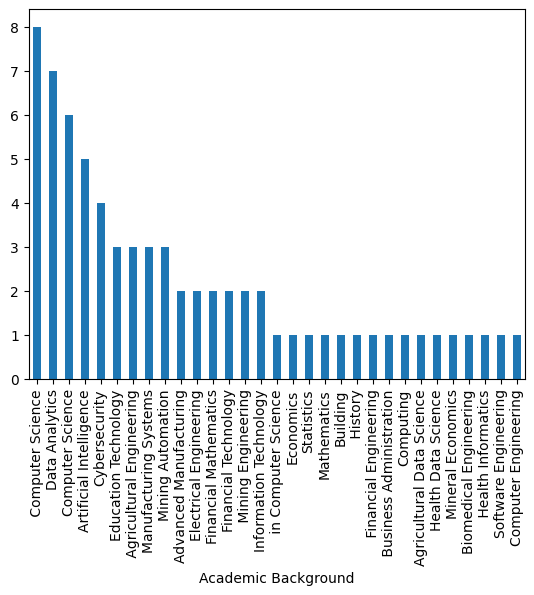

In [5]:
primary_data["Academic Background"].value_counts().plot(kind="bar")

<Axes: xlabel='Interests'>

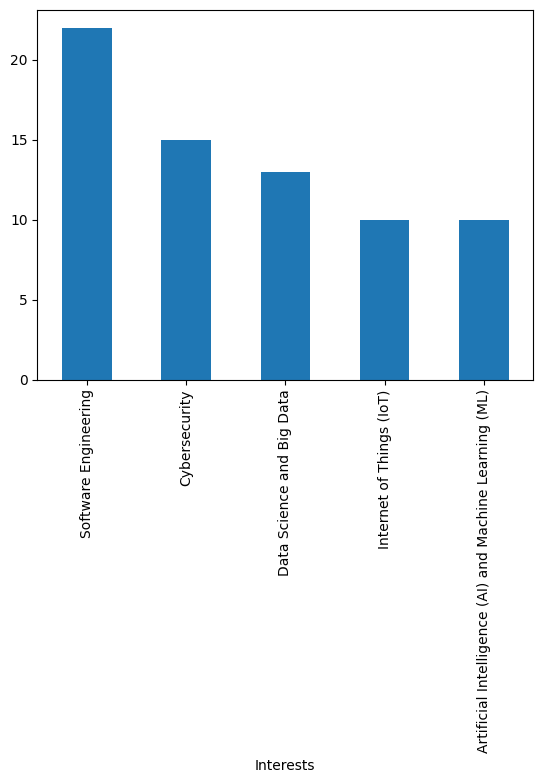

In [6]:
primary_data["Interests"].value_counts().plot(kind="bar")

Most Common Keywords:
[('Leading a software development team', 12), ('Organizing IoT workshops', 9), ('Engaging in community farming projects', 8), ('Member of the cybersecurity club', 7), ('Volunteering at local coding clubs', 7), ('Participating in hackathons', 4), ('Participating in mineral conservation activities', 3), ('Going for community meetup', 1), ('Photography', 1), ('Networking with individuals in my tech communities', 1)]


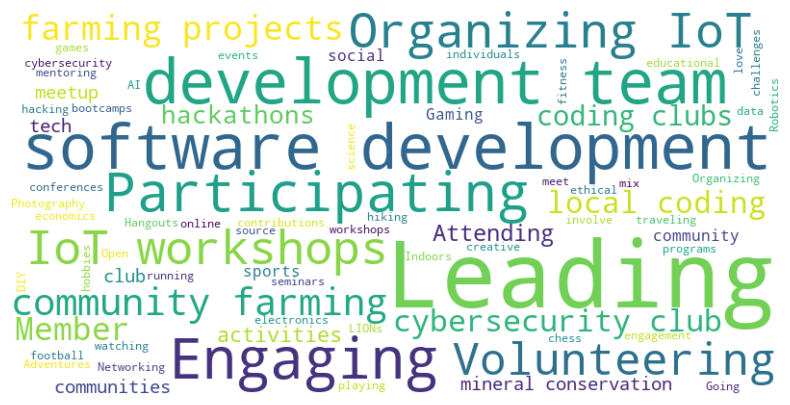

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Column name
column_name = 'Description of Social Activities'

# Convert all entries to strings, then join and split into keywords
all_keywords = ', '.join(primary_data[column_name].astype(str)).split(', ')

# Count occurrences of each keyword
keyword_counter = Counter(all_keywords)

# Display most common keywords
print("Most Common Keywords:")
print(keyword_counter.most_common(10))

# Generate WordCloud for keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_keywords))

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:

# Load the CSV files
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("df2.csv")
df3 = pd.read_csv("df3.csv")
df4 = pd.read_csv("df4.csv")
df5 = pd.read_csv("df5.csv")

# Combine the DataFrames into one
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in combined_df.columns:
    combined_df.drop(columns=["Unnamed: 0"], inplace=True)

# Drop duplicate rows
combined_df.drop_duplicates(inplace=True)

# Reset the index and add a 'Title No' column starting from 1
combined_df.reset_index(drop=True, inplace=True)
combined_df['Title No'] = combined_df.index + 1

# Drop the 'Link' column if it exists
if 'Link' in combined_df.columns:
    combined_df.drop(columns=["Link"], inplace=True)

# Display the final DataFrame
combined_df


,Title,Snippet,Title No
0,[HTML][HTML] Machine learning and artificial i...,… Machine learning (ML) and artificial intelli...,1
1,Edge computing with artificial intelligence: A...,"… machine learning (ML), a recently popular ar...",2
2,Artificial intelligence and machine learning a...,"… computational linguistic etc. Hence, figure ...",3
3,Machine learning and artificial neural network...,"… mainstream AI researchers, but also those wo...",4
4,Artificial intelligence and machine learning i...,… Computational toxicology aims … artificial i...,5
...,...,...,...
510,The role of cloud-MANET framework in the inter...,… This research is a step forward in the field...,511
511,Assessment of the suitability of fog computing...,… computing paradigm and the conventional clou...,512
512,Edge QoE: Computation offloading with deep rei...,"… , we focus on QoE-oriented computation offlo...",513
513,Computation offloading and resource allocation...,… Due to the limited bandwidth of the IoT gate...,514


In [9]:
import re
# Function to remove text inside square brackets
def remove_square_brackets(text):
    return re.sub(r'\[.*?\]', '', text)

# Apply the function to the 'title' column
combined_df['Title'] = combined_df['Title'].apply(remove_square_brackets)

# Display the cleaned DataFrame
print(combined_df)

                                                 Title  \
0     Machine learning and artificial intelligence:...   
1    Edge computing with artificial intelligence: A...   
2    Artificial intelligence and machine learning a...   
3    Machine learning and artificial neural network...   
4    Artificial intelligence and machine learning i...   
..                                                 ...   
510  The role of cloud-MANET framework in the inter...   
511  Assessment of the suitability of fog computing...   
512  Edge QoE: Computation offloading with deep rei...   
513  Computation offloading and resource allocation...   
514   Cloud and fog computing platforms for interne...   

                                               Snippet  Title No  
0    … Machine learning (ML) and artificial intelli...         1  
1    … machine learning (ML), a recently popular ar...         2  
2    … computational linguistic etc. Hence, figure ...         3  
3    … mainstream AI researchers, b

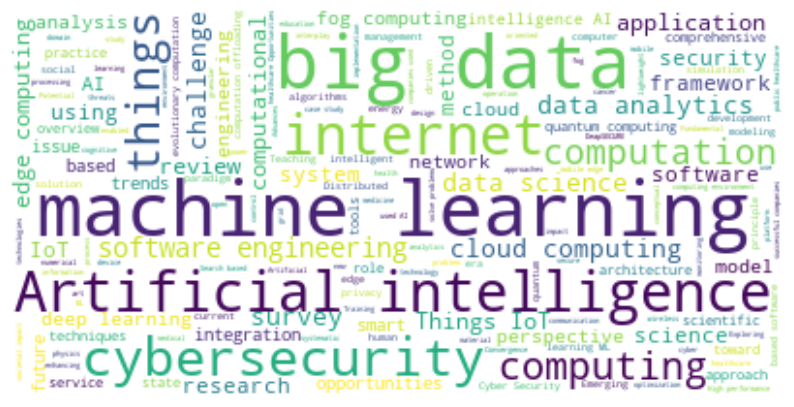

In [10]:

# 1.2 - Visualize the frequency of words to identify common themes
all_titles = ' '.join(combined_df['Title'])
wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(all_titles)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Data Cleaning and Exploration

In [11]:




# Step 1: Text Preprocessing

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove square brackets and text inside them
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Lemmatization using NLTK's WordNet lemmatizer
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

combined_df['cleaned_title'] = combined_df['Title'].apply(preprocess_text)

Most common words: [('computing', 155), ('data', 139), ('learning', 131), ('intelligence', 113), ('machine', 108), ('artificial', 105), ('big', 102), ('thing', 98), ('internet', 97), ('cybersecurity', 95), ('software', 80), ('engineering', 64), ('computation', 63), ('science', 61), ('iot', 54), ('cloud', 54), ('analytics', 43), ('challenge', 41), ('edge', 40), ('survey', 39)]


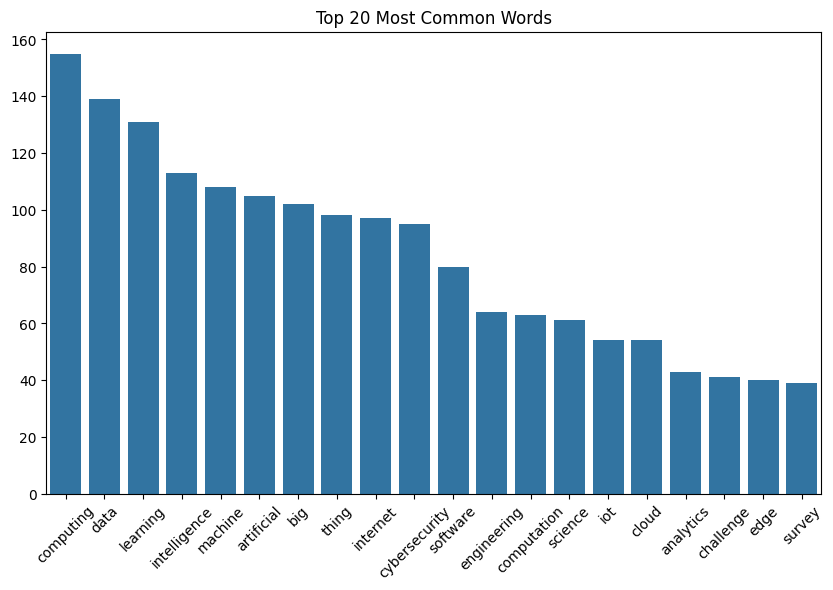

In [12]:
# Step 2: Word Frequency Analysis
# Word Frequency Distribution
all_words = ' '.join(combined_df['cleaned_title']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
print("Most common words:", common_words)

# Plotting word frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.title("Top 20 Most Common Words")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Step 3: Topic Modeling using LDA

# Convert text data to a matrix of token counts
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combined_df['cleaned_title'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)

# Visualizing the topics
pyLDAvis.enable_notebook()
panel =  pyLDAvis.lda_model.prepare(lda, tfidf, tfidf_vectorizer, mds='tsne')
panel
# Prepare the LDA visualization


In [13]:

import spacy



# Step 5: Sentence Structure and Syntax Analysis

# Load Spacy model for dependency parsing
nlp = spacy.load('en_core_web_sm')

# Dependency Parsing for the first title
doc = nlp(combined_df['cleaned_title'].iloc[0])
for token in doc:
    print(f"{token.text}: {token.dep_} -> {token.head.text}")

# POS Tagging Analysis
combined_df['pos_tags'] = combined_df['cleaned_title'].apply(lambda x: pos_tag(word_tokenize(x)))

# Most common POS patterns
pos_patterns = combined_df['pos_tags'].apply(lambda x: ' '.join([pos for word, pos in x]))
common_pos_patterns = Counter(pos_patterns).most_common(10)
print("Most common POS patterns:", common_pos_patterns)


machine: nmod -> machine
learning: acl -> machine
artificial: amod -> intelligence
intelligence: dobj -> learning
two: nummod -> traveler
fellow: amod -> traveler
traveler: nmod -> machine
quest: appos -> traveler
intelligent: amod -> machine
behavior: compound -> machine
machine: ROOT -> machine
Most common POS patterns: [('JJ NN NN NN', 5), ('JJ NN NN VBG JJ NN NN JJ NN', 5), ('JJ NN NN JJ NN VBN RB NN VBG NN NN', 5), ('JJ NN NN', 5), ('JJ NN NN VBG JJ NN', 4), ('JJ NN NN VBG JJ JJ NN', 4), ('NN VBG JJ NN NN NN', 4), ('NN NN NN NN', 4), ('VBG NN NN NN', 4), ('VBN NN NN', 4)]


In [14]:
common_pos_patterns

[('JJ NN NN NN', 5),
 ('JJ NN NN VBG JJ NN NN JJ NN', 5),
 ('JJ NN NN JJ NN VBN RB NN VBG NN NN', 5),
 ('JJ NN NN', 5),
 ('JJ NN NN VBG JJ NN', 4),
 ('JJ NN NN VBG JJ JJ NN', 4),
 ('NN VBG JJ NN NN NN', 4),
 ('NN NN NN NN', 4),
 ('VBG NN NN NN', 4),
 ('VBN NN NN', 4)]

In [15]:


# Step 6: Semantic Analysis using Word Embeddings

# Example with Gensim's Word2Vec
tokens = [word_tokenize(text) for text in combined_df['cleaned_title']]
model = gensim.models.Word2Vec(tokens, vector_size=100, window=5, min_count=1, workers=4)

# Find similar words to 'artificial intelligence'
similar_words = model.wv.most_similar('artificial')
print("Words similar to 'artificial':", similar_words)



Words similar to 'artificial': [('intelligence', 0.6188130974769592), ('learning', 0.6004453301429749), ('engineering', 0.5925402045249939), ('machine', 0.5905811190605164), ('computing', 0.5846720337867737), ('internet', 0.568080723285675), ('thing', 0.5560798645019531), ('iot', 0.5387807488441467), ('application', 0.5327401757240295), ('emerging', 0.5324785113334656)]


In [16]:


# Find similar words to 'Software'
similar_words = model.wv.most_similar('software')
print("Words similar to 'Software:", similar_words)



Words similar to 'Software: [('computing', 0.5953021049499512), ('thing', 0.5839895606040955), ('computation', 0.5539582371711731), ('engineering', 0.543225109577179), ('artificial', 0.5262094736099243), ('internet', 0.5200061798095703), ('intelligence', 0.5120757222175598), ('model', 0.5101815462112427), ('security', 0.4909645915031433), ('system', 0.48852017521858215)]


In [17]:


# Find similar words to 'cybersecurity'
similar_words = model.wv.most_similar('cybersecurity')
print("Words similar to 'Cybersecurity':", similar_words)



Words similar to 'Cybersecurity': [('computing', 0.6766033172607422), ('internet', 0.5467556715011597), ('learning', 0.5324913263320923), ('thing', 0.523160994052887), ('iot', 0.5214210152626038), ('framework', 0.5156627893447876), ('edge', 0.5109730958938599), ('network', 0.49744752049446106), ('artificial', 0.4922504723072052), ('software', 0.48195141553878784)]


In [18]:
# Step 7: Classification using Bloom’s Taxonomy of Verbs

# Bloom's Taxonomy of Verbs (Simplified)
bloom_verbs = {
    'Remember':[
    "arrange", "copy", "define", "describe", "discover", "duplicate", 
    "enumerate", "find", "identify", "label", "list", "locate", "match", 
    "memorize", "name", "observe", "omit", "order", "outline", "quote", 
    "recall", "recite", "recognize", "record", "repeat", "reproduce", 
    "retell", "retrieve", "select", "state", "underline"],
    'Understand': [
    "ask", "associate", "cite", "classify", "convert", "demonstrate", "describe", 
    "discover", "discuss", "distinguish", "elaborate", "estimate", "exemplify", 
    "explain", "express", "extend", "familiarize", "generalize", "give examples", 
    "group", "indicate", "interpret", "map", "match", "model", "observe", "order", 
    "outline", "paraphrase", "provide", "relate", "report", "represent", "research", 
    "restate", "review", "rewrite", "select", "show", "summarize", "trace", 
    "translate"],
    'Apply': [
    "act", "administer", "apply", "articulate", "calculate", "change", "chart", 
    "choose", "collect", "combine", "complete", "compute", "conduct", "demonstrate", 
    "determine", "discover", "document", "dramatize", "employ", "establish", "examine", 
    "execute", "graph", "illustrate", "interview", "manipulate", "measure", 
    "modify", "operate", "organize", "paint", "place", "practice", "record", 
    "relate", "schedule", "simulate", "sketch", "solve", "transfer", "transform", 
    "use"],
    'Analyze': [
    "advertise", "appraise", "break down", "categorize", "classify", "compare", 
    "conclude", "connect", "contrast", "correlate", "deduce", "devise", "diagram", 
    "differentiate", "discriminate", "dissect", "distinguish", "divide", "estimate", 
    "examine", "experiment", "explain", "extract", "identify", "infer", "interpret", 
    "investigate", "organize", "outline", "plan", "point out", "question", "select", 
    "separate", "subdivide", "survey", "test"],
    'Evaluate': [
    "appraise", "argue", "assess", "check", "compare", "conclude", "consider", 
    "convince", "criticize", "critique", "debate", "decide", "defend", "discriminate", 
    "distinguish", "editorialize", "evaluate", "find errors", "grade", "justify", 
    "order", "persuade", "predict", "prioritize", "rank", "rate", "recommend", 
    "reframe", "respond", "score", "substantiate", "suggest", "support", "value", 
    "verify", "weigh"],
    'Create':[
    "adapt", "assemble", "compile", "compose", "construct", "create", "design", "develop", 
    "devise", "express", "facilitate", "formulate", "invent", "hypothesize", "imagine", 
    "improve", "integrate", "intervene", "make", "model", "negotiate", "originate", 
    "plan", "portray", "prepare", "produce", "propose", "rearrange", "reorganize", 
    "report", "revise", "role-play", "schematize", "simulate", "speculate", "structure", 
    "substitute", "test", "validate", "write" ]

}

def classify_verb(verb):
    for category, verbs in bloom_verbs.items():
        if verb in verbs:
            return category
    return 'Unknown'

# Extract verbs and classify them
def classify_verbs_in_title(title):
    verbs = [word for word, pos in pos_tag(word_tokenize(title)) if pos.startswith('VB')]
    return [classify_verb(verb.lower()) for verb in verbs]

combined_df['bloom_classification'] = combined_df['cleaned_title'].apply(classify_verbs_in_title)

# Summarize the classification
classification_summary = Counter([verb for sublist in combined_df['bloom_classification'] for verb in sublist])
print("Summary of verbs classification according to Bloom's Taxonomy:", classification_summary)

# Step 8: Insights and Visualization
# Check the length of combined_df
print(f"Length of combined_df: {len(combined_df)}")

# Check the length of the flattened list
flattened_bloom_classification = [verb for sublist in combined_df['bloom_classification'] for verb in sublist]
print(f"Length of flattened bloom_classification: {len(flattened_bloom_classification)}")



Summary of verbs classification according to Bloom's Taxonomy: Counter({'Unknown': 530, 'Understand': 1, 'Remember': 1})
Length of combined_df: 515
Length of flattened bloom_classification: 532


In [19]:
# Ensure that 'bloom_classification' has the correct format and matches the index
combined_df['bloom_classification'] = combined_df['bloom_classification'].apply(lambda x: x if isinstance(x, list) else [x])


In [20]:
combined_df

,Title,Snippet,Title No,cleaned_title,pos_tags,bloom_classification
0,Machine learning and artificial intelligence:...,… Machine learning (ML) and artificial intelli...,1,machine learning artificial intelligence two f...,"[(machine, NN), (learning, VBG), (artificial, ...",[Unknown]
1,Edge computing with artificial intelligence: A...,"… machine learning (ML), a recently popular ar...",2,edge computing artificial intelligence machine...,"[(edge, NN), (computing, VBG), (artificial, JJ...","[Unknown, Unknown]"
2,Artificial intelligence and machine learning a...,"… computational linguistic etc. Hence, figure ...",3,artificial intelligence machine learning algor...,"[(artificial, JJ), (intelligence, NN), (machin...",[Unknown]
3,Machine learning and artificial neural network...,"… mainstream AI researchers, but also those wo...",4,machine learning artificial neural network acc...,"[(machine, NN), (learning, VBG), (artificial, ...","[Unknown, Unknown]"
4,Artificial intelligence and machine learning i...,… Computational toxicology aims … artificial i...,5,artificial intelligence machine learning compu...,"[(artificial, JJ), (intelligence, NN), (machin...","[Unknown, Unknown, Unknown]"
...,...,...,...,...,...,...
510,The role of cloud-MANET framework in the inter...,… This research is a step forward in the field...,511,role cloudmanet framework internet thing iot,"[(role, NN), (cloudmanet, NN), (framework, NN)...",[]
511,Assessment of the suitability of fog computing...,… computing paradigm and the conventional clou...,512,assessment suitability fog computing context i...,"[(assessment, JJ), (suitability, NN), (fog, NN...",[Unknown]
512,Edge QoE: Computation offloading with deep rei...,"… , we focus on QoE-oriented computation offlo...",513,edge qoe computation offloading deep reinforce...,"[(edge, NN), (qoe, NN), (computation, NN), (of...","[Unknown, Unknown]"
513,Computation offloading and resource allocation...,… Due to the limited bandwidth of the IoT gate...,514,computation offloading resource allocation low...,"[(computation, NN), (offloading, VBG), (resour...",[Unknown]


In [21]:
df_primary['cleaned_text'] = df_primary['Combined'].apply(preprocess_text)

In [22]:
df_secondary=combined_df.copy()

### TfidfVectorizer

In [23]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Bi-grams
primary_tfidf_matrix = tfidf_vectorizer.fit_transform(df_primary['cleaned_text'])
secondary_tfidf_matrix = tfidf_vectorizer.transform(df_secondary["cleaned_title"])

import numpy as np


# Calculate cosine similarity
cosine_sim_tfidf = cosine_similarity(secondary_tfidf_matrix, primary_tfidf_matrix)

# For each secondary data point, find the index of the primary data point with the highest similarity
best_match_indices = np.argmax(cosine_sim_tfidf, axis=1)
best_match_scores = np.max(cosine_sim_tfidf, axis=1)

# Add the matched primary data and similarity score to the secondary dataset
df_secondary['matched_primary_index'] = best_match_indices
df_secondary['similarity_score'] = best_match_scores

# Merge with primary data to include the relevant details from primary data
result_df = df_secondary.merge(df_primary, left_on='matched_primary_index', right_index=True, suffixes=('_secondary', '_primary'))



In [24]:
result_df.columns

Index(['Title', 'Snippet', 'Title No', 'cleaned_title', 'pos_tags',
       'bloom_classification', 'matched_primary_index', 'similarity_score',
       'Interests', 'Description of Social Activities', 'Preferred Industry',
       'Academic Background', 'Work Experience', 'Combined', 'cleaned_text'],
      dtype='object')

In [25]:
need=['Interests', 'Description of Social Activities', 'Preferred Industry',
       'Academic Background', 'Work Experience','Title', 'cleaned_title']

In [26]:
data1=result_df[need]

In [27]:
data1.head()

,Interests,Description of Social Activities,Preferred Industry,Academic Background,Work Experience,Title,cleaned_title
0,Software Engineering,Gaming,ICT,Building,Frontend Developer,Machine learning and artificial intelligence:...,machine learning artificial intelligence two f...
3,Software Engineering,Gaming,ICT,Building,Frontend Developer,Machine learning and artificial neural network...,machine learning artificial neural network acc...
7,Software Engineering,Gaming,ICT,Building,Frontend Developer,Artificial intelligence (AI) and machine lear...,artificial intelligence ai machine learning mu...
44,Software Engineering,Gaming,ICT,Building,Frontend Developer,"Machine learning (ML) in medicine: Review, ap...",machine learning ml medicine review applicatio...
57,Software Engineering,Gaming,ICT,Building,Frontend Developer,Putting artificial intelligence (AI) on the s...,putting artificial intelligence ai spot machin...


### Word2Vec

In [28]:
# Use Word2Vec or pre-trained embeddings
from gensim.models import Word2Vec

# Assuming text data is tokenized
primary_tokens = df_primary['cleaned_text'].apply(lambda x: x.split())
secondary_tokens = df_secondary["cleaned_title"].apply(lambda x: x.split())

model = Word2Vec(sentences=list(primary_tokens) + list(secondary_tokens), vector_size=100, window=5, min_count=1)

# Convert tokens to vectors and calculate similarity
def vectorize_text(tokens):
    return np.mean([model.wv[word] for word in tokens if word in model.wv], axis=0)

primary_vectors = np.array([vectorize_text(tokens) for tokens in primary_tokens])
secondary_vectors = np.array([vectorize_text(tokens) for tokens in secondary_tokens])

cosine_sim_word2vec = cosine_similarity(secondary_vectors, primary_vectors)


In [29]:
threshold = 0.5  # Adjust based on your analysis
filtered_matches = np.where(cosine_sim_word2vec > threshold)
# Find best match and score
best_match_indices = np.argmax(cosine_sim_word2vec, axis=1)
best_match_scores = np.max(cosine_sim_word2vec, axis=1)

# Integrate data based on best matches
df_secondary['best_match_index'] = best_match_indices
df_secondary['similarity_score'] = best_match_scores
result_df2 = df_secondary.merge(df_primary, left_on='best_match_index', right_index=True, suffixes=('_secondary', '_primary'))

In [30]:
data2=result_df2[need]
data2.head()

,Interests,Description of Social Activities,Preferred Industry,Academic Background,Work Experience,Title,cleaned_title
0,Software Engineering,Gaming,ICT,Building,Frontend Developer,Machine learning and artificial intelligence:...,machine learning artificial intelligence two f...
6,Software Engineering,Gaming,ICT,Building,Frontend Developer,Applications of artificial intelligence and ma...,application artificial intelligence machine le...
7,Software Engineering,Gaming,ICT,Building,Frontend Developer,Artificial intelligence (AI) and machine lear...,artificial intelligence ai machine learning mu...
8,Software Engineering,Gaming,ICT,Building,Frontend Developer,"Artificial intelligence, machine learning, and...",artificial intelligence machine learning cardi...
9,Software Engineering,Gaming,ICT,Building,Frontend Developer,Artificial intelligence and machine learning ...,artificial intelligence machine learning preci...


### SentenceTransformer

In [31]:
import tensorflow as tf
from transformers import TFAutoModel

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

primary_embeddings = model.encode(df_primary['cleaned_text'].tolist())
secondary_embeddings = model.encode(df_secondary["cleaned_title"].tolist())

cosine_sim_sentence = cosine_similarity(secondary_embeddings, primary_embeddings)


In [32]:
# Find best match and score
best_match_indices = np.argmax(cosine_sim_sentence, axis=1)
best_match_scores = np.max(cosine_sim_sentence, axis=1)

# Integrate data based on best matches
df_secondary['best_match_index'] = best_match_indices
df_secondary['similarity_score'] = best_match_scores
result_df3 = df_secondary.merge(df_primary, left_on='best_match_index', right_index=True, suffixes=('_secondary', '_primary'))

In [33]:
result_df3[need]["Interests"].unique()

array(['Artificial Intelligence (AI) and Machine Learning (ML)',
       'Software Engineering', 'Data Science and Big Data',
       'Cybersecurity', 'Internet of Things (IoT)'], dtype=object)

In [34]:
# Compare average cosine similarities
print("Average Cosine Similarity (TF-IDF):", cosine_sim_tfidf.mean())
print("Average Cosine Similarity (Word2Vec):", cosine_sim_word2vec.mean())
print("Average Cosine Similarity (SentenceTransformer):", cosine_sim_sentence.mean())

Average Cosine Similarity (TF-IDF): 0.06223645910201911
Average Cosine Similarity (Word2Vec): 0.9209232
Average Cosine Similarity (SentenceTransformer): 0.536315


In [35]:
data3=result_df3[need]
data3.head()

,Interests,Description of Social Activities,Preferred Industry,Academic Background,Work Experience,Title,cleaned_title
0,Artificial Intelligence (AI) and Machine Learn...,"Participating in AI conferences, online commun...",Technology,Electrical Engineering,Machine Learning Engineer,Machine learning and artificial intelligence:...,machine learning artificial intelligence two f...
4,Artificial Intelligence (AI) and Machine Learn...,"Participating in AI conferences, online commun...",Technology,Electrical Engineering,Machine Learning Engineer,Artificial intelligence and machine learning i...,artificial intelligence machine learning compu...
8,Artificial Intelligence (AI) and Machine Learn...,"Participating in AI conferences, online commun...",Technology,Electrical Engineering,Machine Learning Engineer,"Artificial intelligence, machine learning, and...",artificial intelligence machine learning cardi...
13,Artificial Intelligence (AI) and Machine Learn...,"Participating in AI conferences, online commun...",Technology,Electrical Engineering,Machine Learning Engineer,Artificial intelligence within the interplay b...,artificial intelligence within interplay natur...
14,Artificial Intelligence (AI) and Machine Learn...,"Participating in AI conferences, online commun...",Technology,Electrical Engineering,Machine Learning Engineer,Artificial intelligence to deep learning: mac...,artificial intelligence deep learning machine ...


n.b: Based on Human Evaluation on the three  Vectorization , SentenceTransformer is the best

In [37]:
df=data3.copy()

In [38]:
# Normalize text data by converting to lowercase and stripping extra spaces
df = df.apply(lambda x: x.str.lower().str.strip())

# Standardize similar terms in 'Interests'
df['Interests'] = df['Interests'].replace({
    'artificial intelligence (ai) and machine learning (ml)': 'artificial intelligence and machine learning',
    'internet of things (iot)' :'internet of things'
    
})

In [39]:
df

,Interests,Description of Social Activities,Preferred Industry,Academic Background,Work Experience,Title,cleaned_title
0,artificial intelligence and machine learning,"participating in ai conferences, online commun...",technology,electrical engineering,machine learning engineer,machine learning and artificial intelligence: ...,machine learning artificial intelligence two f...
4,artificial intelligence and machine learning,"participating in ai conferences, online commun...",technology,electrical engineering,machine learning engineer,artificial intelligence and machine learning i...,artificial intelligence machine learning compu...
8,artificial intelligence and machine learning,"participating in ai conferences, online commun...",technology,electrical engineering,machine learning engineer,"artificial intelligence, machine learning, and...",artificial intelligence machine learning cardi...
13,artificial intelligence and machine learning,"participating in ai conferences, online commun...",technology,electrical engineering,machine learning engineer,artificial intelligence within the interplay b...,artificial intelligence within interplay natur...
14,artificial intelligence and machine learning,"participating in ai conferences, online commun...",technology,electrical engineering,machine learning engineer,artificial intelligence to deep learning: mach...,artificial intelligence deep learning machine ...
...,...,...,...,...,...,...,...
416,internet of things,organizing iot workshops,education,computer science,software developer,the evolution of the internet of things (iot):...,evolution internet thing iot computational tex...
449,internet of things,organizing iot workshops,education,computer science,software developer,learning iot in edge: deep learning for the in...,learning iot edge deep learning internet thing...
474,internet of things,organizing iot workshops,education,computer science,software developer,"context-aware computing, learning, and big dat...",contextaware computing learning big data inter...
427,software engineering,"organizing coding bootcamps, traveling",technology,information technology,software developer,review of internet of things (iot) in electric...,review internet thing iot electric power energ...


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Combine text columns into a single column
df['combined_text'] = df['Interests'] + ' ' + df['Description of Social Activities'] + ' ' + df['Preferred Industry'] + ' ' + df['Academic Background'] + ' ' + df['Work Experience']

# Drop the original text columns
df.drop(columns=['Interests', 'Description of Social Activities', 'Preferred Industry', 'Academic Background', 'Work Experience'], inplace=True)



#### USING  TfidfVectorizer to convert text into TF-IDF vectors.

In [43]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()


# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the combined text data
X_tfidf = tfidf.fit_transform(df['combined_text'])

# Vectorize the 'Title' column separately
title_tfidf = tfidf.transform(df['cleaned_title'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, title_tfidf, test_size=0.2, random_state=42)


# Output the resulting splits
print("X_train of TfidfVectorizer :\n", X_train)
print("y_train of TfidfVectorizer:\n", y_train)
print("X_test of TfidfVectorizer:\n", X_test)
print("y_test of TfidfVectorizer:\n", y_test)

X_train of TfidfVectorizer :
   (0, 34)	0.38479251716619484
  (0, 28)	0.18004184075351534
  (0, 87)	0.24194681284368175
  (0, 33)	0.24194681284368175
  (0, 82)	0.34915723487856276
  (0, 59)	0.24194681284368175
  (0, 37)	0.48527249401801387
  (0, 38)	0.3124337905202517
  (0, 60)	0.3073189157845503
  (0, 61)	0.3073189157845503
  (1, 34)	0.38479251716619484
  (1, 28)	0.18004184075351534
  (1, 87)	0.24194681284368175
  (1, 33)	0.24194681284368175
  (1, 82)	0.34915723487856276
  (1, 59)	0.24194681284368175
  (1, 37)	0.48527249401801387
  (1, 38)	0.3124337905202517
  (1, 60)	0.3073189157845503
  (1, 61)	0.3073189157845503
  (2, 69)	0.32683148993914446
  (2, 14)	0.2972245695514645
  (2, 84)	0.2795329805923117
  (2, 8)	0.22046017880404642
  (2, 29)	0.5535905926664382
  :	:
  (409, 52)	0.361578916474358
  (409, 73)	0.37972366118900414
  (410, 92)	0.2958932042891268
  (410, 57)	0.2958932042891268
  (410, 8)	0.1850166231616913
  (410, 29)	0.15486313314397043
  (410, 19)	0.3025690047129922
  (410,

In [44]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\Users\Lightified\AppData\Local\Temp\ipykernel_10608\1556146645.py:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [67]:
# Define the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='linear'))  # Linear output layer for regression-type output

# Compile the model
model.compile(loss='mse', optimizer='adam')  # Using MSE loss for vector output
# Start time
start_time = time.time()

# Train the model
model.fit(X_train.toarray(), y_train.toarray(), epochs=10, batch_size=8, validation_data=(X_test.toarray(), y_test.toarray()))

# Get the output vectors from the model
output_vectors = model.predict(X_test.toarray())
# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time

# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time  for TfidfVectorizer: {cpu_time} seconds")
# Total number of parameters
total_params = model.count_params()
print(f"Total parameters for TfidfVectorizer: {total_params}")


mse = mean_squared_error(y_test.toarray(), output_vectors)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test.toarray(), output_vectors)
r2 = r2_score(y_test.toarray(), output_vectors)

print(f"Mean Squared Error (MSE) for TfidfVectorizer: {mse}")
print(f"Root Mean Squared Error (RMSE) for TfidfVectorizer: {rmse}")
print(f"Mean Absolute Error (MAE) for TfidfVectorizer: {mae}")
print(f"R-Squared for TfidfVectorizer: {r2}")

Epoch 1/10


c:\Users\Lightified\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0101 - val_loss: 0.0081
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - val_loss: 0.0071
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0076 - val_loss: 0.0065
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - val_loss: 0.0057
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0057
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
CPU Time  for TfidfVectorizer: 7.41287636756897 seconds
Total parameters for TfidfVectorizer: 25920
Mean Squared Error (MSE) for Tfi

In [46]:
# Define the ANN model
model2 = Sequential()
model2.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(y_train.shape[1], activation='linear'))  # Linear output layer for regression-type output

# Compile the model
model2.compile(loss='mse', optimizer='adam')  # Using MSE loss for vector output
# Start time
start_time = time.time()

# Train the model
model2.fit(X_train.toarray(), y_train.toarray(), epochs=50, batch_size=8, validation_data=(X_test.toarray(), y_test.toarray()))

# Get the output vectors from the model
output_vectors1 = model2.predict(X_test.toarray())
# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
# Use cosine similarity to recommend the closest title
# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time  of TfidfVectorizer @ eps50: {cpu_time} seconds")

# Total number of parameters
total_params2 = model2.count_params()
print(f"Total parameters for TfidfVectorizer @ eps50: {total_params2}")



mse = mean_squared_error(y_test.toarray(), output_vectors1)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test.toarray(), output_vectors1)
r2 = r2_score(y_test.toarray(), output_vectors1)

print(f"Mean Squared Error (MSE) of TfidfVectorizer @ eps50: {mse}")
print(f"Root Mean Squared Error (RMSE)  of TfidfVectorizer @ eps50: {rmse}")
print(f"Mean Absolute Error (MAE)  of TfidfVectorizer @ eps50: {mae}")
print(f"R-Squared  of TfidfVectorizer @ eps50: {r2}")

Epoch 1/50


c:\Users\Lightified\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0101 - val_loss: 0.0082
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084 - val_loss: 0.0074
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - val_loss: 0.0062
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - val_loss: 0.0060
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0060
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - val_loss: 0.0058

In [47]:

# 
from tensorflow.keras.layers import BatchNormalization
model3 = Sequential()
model3.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(y_train.shape[1], activation='linear'))  # Linear output layer for regression

# Compile the model
model3.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))  # Using MSE loss for regression

# Start time
start_time = time.time()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model3.fit(X_train.toarray(), y_train.toarray(), epochs=50, batch_size=8, validation_data=(X_test.toarray(), y_test.toarray()), callbacks=[early_stopping])
# Train the model


# Get the output vectors from the model
output_vectors2 = model3.predict(X_test.toarray())

# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time TfidfVectorizer @ model3 : {cpu_time} seconds")


# Total number of parameters
total_params3 = model3.count_params()
print(f"Total parameters for TfidfVectorizer for model3: {total_params3}")


# Calculate evaluation metrics
mse = mean_squared_error(y_test.toarray(), output_vectors2)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test.toarray(), output_vectors2)
r2 = r2_score(y_test.toarray(), output_vectors2)

print(f"Mean Squared Error (MSE) for TfidfVectorizer for model3: {mse}")
print(f"Root Mean Squared Error (RMSE) for TfidfVectorizer for model3: {rmse}")
print(f"Mean Absolute Error (MAE) for TfidfVectorizer for model3: {mae}")
print(f"R-Squared for TfidfVectorizer for model3: {r2}")

c:\Users\Lightified\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1276 - val_loss: 0.0100
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0492 - val_loss: 0.0097
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0329 - val_loss: 0.0097
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0246 - val_loss: 0.0096
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185 - val_loss: 0.0095
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0158 - val_loss: 0.0095
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144 - val_loss: 0.0094
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - val_loss: 0.0094
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - val_loss: 0.0093
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - val_loss: 0.0093
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - val_l

In [48]:
# HyperModel class for Keras Tuner
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32),
                        input_dim=X_train.shape[1], activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('units_3', min_value=16, max_value=64, step=16),
                        activation='relu'))
        model.add(Dense(y_train.shape[1], activation='linear'))

        model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                      loss='mse')
        return model

# Instantiate the tuner
tuner = RandomSearch(MyHyperModel(),
                     objective='val_loss',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_dir',
                     project_name='ann_hyperparam_tuning')

# Perform the hyperparameter search
tuner.search(X_train.toarray(), y_train.toarray(), epochs=10, validation_data=(X_test.toarray(), y_test.toarray()))

# Start time
start_time = time.time()
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
C.fit(X_train.toarray(), y_train.toarray(), epochs=50, validation_data=(X_test.toarray(), y_test.toarray()), callbacks=[early_stopping])

# Train the model
# Total number of parameters
total_params3 = best_model.count_params()
print(f"Total parameters for TfidfVectorizer for best model: {total_params3}")

# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time TTfidfVectorizer for best model: {cpu_time} seconds")

# Get the output vectors from the best model
output_vectors3 = best_model.predict(X_test.toarray())


# Calculate evaluation metrics
mse = mean_squared_error(y_test.toarray(), output_vectors3)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test.toarray(), output_vectors3)
r2 = r2_score(y_test.toarray(), output_vectors3)

print(f"Mean Squared Error (MSE) for TfidfVectorizer for best model: {mse}")
print(f"Root Mean Squared Error (RMSE) for TfidfVectorizer for best model: {rmse}")
print(f"Mean Absolute Error (MAE) for TfidfVectorizer for best model: {mae}")
print(f"R-Squared for TfidfVectorizer for best model: {r2}")



Trial 10 Complete [00h 00m 14s]
val_loss: 0.006004801020026207

Best val_loss So Far: 0.005791042232885957
Total elapsed time: 00h 02m 36s


c:\Users\Lightified\anaconda3\Lib\site-packages\keras_tuner\src\engine\oracle.py:102: DeprecationWarning: currentThread() is deprecated, use current_thread() instead
  thread_name = threading.currentThread().getName()
c:\Users\Lightified\anaconda3\Lib\site-packages\keras_tuner\src\engine\oracle.py:102: DeprecationWarning: getName() is deprecated, get the name attribute instead
  thread_name = threading.currentThread().getName()
c:\Users\Lightified\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0055 - val_loss: 0.0058
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0053 - val_loss: 0.0058
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0051 - val_loss: 0.0057
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - val_loss: 0.0058
Total parameters for TfidfVectorizer for best model: 65024
CPU Time TT

### Word2Vec

In [49]:
# Assuming text  is tokenized
input_tokens = df['combined_text'].apply(lambda x: x.split())
output_tokens = df['cleaned_title'].apply(lambda x: x.split())
model = Word2Vec(sentences=list(input_tokens) + list(output_tokens), vector_size=100, window=5, min_count=1)

# Convert tokens to vectors and calculate similarity
def vectorize_text(tokens):
    return np.mean([model.wv[word] for word in tokens if word in model.wv], axis=0)

input_vectors = np.array([vectorize_text(tokens) for tokens in input_tokens])
output_vectors = np.array([vectorize_text(tokens) for tokens in output_tokens])


In [50]:



# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(input_vectors, output_vectors, test_size=0.2, random_state=42)


# Output the resulting splits
print("X_train  of Word2Vec :\n", X_train1)
print("y_train of Word2Vec:\n", y_train1)
print("X_test of Word2Vec:\n", X_test1)
print("y_test of Word2Vec:\n", y_test1)

X_train  of Word2Vec :
 [[ 0.03874529  0.10440033 -0.03765572 ... -0.0425752   0.04273446
   0.01438556]
 [ 0.03874529  0.10440033 -0.03765572 ... -0.0425752   0.04273446
   0.01438556]
 [ 0.02235862  0.08667947 -0.03056589 ... -0.03441133  0.0361492
   0.01763028]
 ...
 [ 0.03899744  0.09026749 -0.04264729 ... -0.04165432  0.03829997
   0.01420251]
 [ 0.03825655  0.08259126 -0.03744323 ... -0.04165309  0.02635377
   0.00958635]
 [ 0.03749879  0.09889888 -0.04125016 ... -0.03969463  0.03805897
   0.01323356]]
y_train of Word2Vec:
 [[ 0.04153726  0.10287923 -0.03946303 ... -0.04216641  0.04034336
   0.00813635]
 [ 0.03997619  0.1038929  -0.04142427 ... -0.03951369  0.04559502
   0.00892635]
 [ 0.04877783  0.12965988 -0.05430897 ... -0.05655431  0.05394812
   0.02143437]
 ...
 [ 0.04098165  0.10958117 -0.04425261 ... -0.04927749  0.04242746
   0.01466964]
 [ 0.06328259  0.13979761 -0.06260643 ... -0.06472637  0.05385051
   0.01080743]
 [ 0.04249321  0.1066483  -0.04501546 ... -0.04372837

In [51]:
# Define the ANN model
model5 = Sequential()
model5.add(Dense(128, input_dim=X_train1.shape[1], activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(y_train1.shape[1], activation='linear'))  # Linear output layer for regression-type output

# Compile the model
model5.compile(loss='mse', optimizer='adam')  # Using MSE loss for vector output
# Start time
start_time = time.time()

# Train the model
model5.fit(X_train1, y_train1, epochs=10, batch_size=8, validation_data=(X_test1, y_test1))

# Get the output vectors from the model
output_vectors5 = model5.predict(X_test1)
# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
# Use cosine similarity to recommend the closest title
# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time of Word2Vec: {cpu_time} seconds")


mse = mean_squared_error(y_test1, output_vectors5)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test1, output_vectors5)
r2 = r2_score(y_test1, output_vectors5)

print(f"Mean Squared Error (MSE) of Word2Vec: {mse}")
print(f"Root Mean Squared Error (RMSE) of Word2Vec: {rmse}")
print(f"Mean Absolute Error (MAE) of Word2Vec: {mae}")
print(f"R-Squared of Word2Vec: {r2} ")

c:\Users\Lightified\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0178 - val_loss: 0.0028
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - val_loss: 0.0016
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
CPU Time of Word2Vec: 9.15873098373413 seconds
Mean Squared Error (MSE) of Word2Vec: 0.0015675133327022195
Root Mean Sq

In [52]:
# Define the ANN model
model6 = Sequential()
model6.add(Dense(128, input_dim=X_train1.shape[1], activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))
model6.add(Dense(256, activation='relu'))
model6.add(Dense(128, activation='relu'))
model6.add(Dense(y_train1.shape[1], activation='linear'))  # Linear output layer for regression

# Compile the model
model6.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))  # Using MSE loss for regression

# Start time
start_time = time.time()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model6.fit(X_train1, y_train1, epochs=50, batch_size=8, validation_data=(X_test1, y_test1), callbacks=[early_stopping])
# Train the model


# Get the output vectors from the model
output_vectors6 = model6.predict(X_test1)

# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time of Word2Vec @ eps50: {cpu_time} seconds")

# Calculate evaluation metrics
mse = mean_squared_error(y_test1, output_vectors6)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test1, output_vectors6)
r2 = r2_score(y_test1, output_vectors6)

print(f"Mean Squared Error (MSE) Word2Vec @ eps50: {mse}")
print(f"Root Mean Squared Error (RMSE) Word2Vec @ eps50: {rmse}")
print(f"Mean Absolute Error (MAE) Word2Vec @ eps50: {mae}")
print(f"R-Squared Word2Vec @ eps50: {r2}")

c:\Users\Lightified\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0338 - val_loss: 0.0215
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - val_loss: 0.0183
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - val_loss: 0.0142
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - val_loss: 0.0091
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - val_loss: 0.0039
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017 - val_

In [53]:

# 
from tensorflow.keras.layers import BatchNormalization
model7 = Sequential()
model7.add(Dense(128, input_dim=X_train1.shape[1], activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.3))
model7.add(Dense(256, activation='relu'))
model7.add(Dense(128, activation='relu'))
model7.add(Dense(y_train1.shape[1], activation='linear'))  # Linear output layer for regression

# Compile the model
model7.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))  # Using MSE loss for regression

# Start time
start_time = time.time()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model7.fit(X_train1, y_train1, epochs=50, batch_size=8, validation_data=(X_test1, y_test1), callbacks=[early_stopping])
# Train the model


# Get the output vectors from the model
output_vectors7 = model7.predict(X_test1)

# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time  @  Word2Vec model7 : {cpu_time} seconds")


# Total number of parameters
total_params7 = model7.count_params()
print(f"Total parameters for  Word2Vec model7: {total_params7}")


# Calculate evaluation metrics
mse = mean_squared_error(y_test1, output_vectors7)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test1, output_vectors7)
r2 = r2_score(y_test1, output_vectors7)

print(f"Mean Squared Error (MSE) for  Word2Vec model7: {mse}")
print(f"Root Mean Squared Error (RMSE) for  Word2Vec model7: {rmse}")
print(f"Mean Absolute Error (MAE) for  Word2Vec model7: {mae}")
print(f"R-Squared for TfidfVectorizer for  Word2Vec model7: {r2}")

c:\Users\Lightified\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0351 - val_loss: 0.0208
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0176 - val_loss: 0.0176
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0119 - val_loss: 0.0130
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - val_loss: 0.0084
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_

In [57]:
# HyperModel class for Keras Tuner
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32),
                        input_dim=X_train1.shape[1], activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('units_3', min_value=16, max_value=64, step=16),
                        activation='relu'))
        model.add(Dense(y_train1.shape[1], activation='linear'))

        model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                      loss='mse')
        return model

# Instantiate the tuner
tuner = RandomSearch(MyHyperModel(),
                     objective='val_loss',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_dir2',
                     project_name='ann_hyperparam_tuning')

# Perform the hyperparameter search
tuner.search(X_train1,  y_train1, epochs=10, validation_data=(X_test1, y_test1))

# Start time
start_time = time.time()
# Retrieve the best model
best_model_W = tuner.get_best_models(num_models=1)[0]

# Train the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
best_model_W.fit(X_train1, y_train1, epochs=50, validation_data=(X_test1, y_test1), callbacks=[early_stopping])

# Train the model
# Total number of parameters
total_params8 = best_model_W.count_params()
print(f"Total parameters for  Word2Vec FOR best model: {total_params8}")

# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time  Word2Vec for best model: {cpu_time} seconds")

# Get the output vectors from the best model
output_vectors8 = best_model_W.predict(X_test1)


# Calculate evaluation metrics
mse = mean_squared_error(y_test1, output_vectors8)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test1, output_vectors8)
r2 = r2_score(y_test1, output_vectors8)

print(f"Mean Squared Error (MSE) forWord2Vec  best model: {mse}")
print(f"Root Mean Squared Error (RMSE) for Word2Vec r best model: {rmse}")
print(f"Mean Absolute Error (MAE) for Word2Vec for best model: {mae}")
print(f"R-Squared for Word2Vec for best model: {r2}")



Trial 10 Complete [00h 00m 14s]
val_loss: 0.0014942693524062634

Best val_loss So Far: 0.001484021544456482
Total elapsed time: 00h 09m 08s


c:\Users\Lightified\anaconda3\Lib\site-packages\keras_tuner\src\engine\oracle.py:102: DeprecationWarning: currentThread() is deprecated, use current_thread() instead
  thread_name = threading.currentThread().getName()
c:\Users\Lightified\anaconda3\Lib\site-packages\keras_tuner\src\engine\oracle.py:102: DeprecationWarning: getName() is deprecated, get the name attribute instead
  thread_name = threading.currentThread().getName()
c:\Users\Lightified\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0016
Total parameters for  Word2Vec FOR best model: 15956
CPU Time  Word2Vec for best model: 5.882501840591431 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Mean Squared Error (MSE) forWord2Vec  best model: 0.0014847497222945094
Root Mean Squared Error (RMSE) for Word2Vec r best model: 0.03853245025033458
Mean Absolute Error (MAE)

In [58]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

input_embeddings = model.encode(df['combined_text'].tolist())
ouput_embeddings = model.encode(df['cleaned_title'].tolist())




In [59]:
# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(input_embeddings,ouput_embeddings, test_size=0.2, random_state=42)


# Output the resulting splits
print("X_train of SentenceTransformer :\n", X_train2)
print("y_train of SentenceTransformer:\n", y_train2)
print("X_test of SentenceTransformer:\n", X_test2)
print("y_test of SentenceTransformer:\n", y_test2)

X_train of SentenceTransformer :
 [[-0.16209376  0.2582773   1.3814331  ... -0.9255638  -1.3428411
   0.5180231 ]
 [-0.16209376  0.2582773   1.3814331  ... -0.9255638  -1.3428411
   0.5180231 ]
 [-0.38868928  0.3552839   1.1979015  ... -1.1159033  -1.2928482
   0.47765002]
 ...
 [ 0.06318503  0.6333865   1.3388988  ... -1.0798569  -1.362767
   0.2098088 ]
 [-0.48962897  0.6017655   1.2066509  ... -0.7911418  -0.7467016
   0.476139  ]
 [-0.20308565  0.26909858  1.4952418  ... -0.6514861  -1.4120504
   0.33905667]]
y_train of SentenceTransformer:
 [[-0.5266002   0.32838616  1.6030376  ... -0.22525372 -0.357914
   0.21206604]
 [-0.26226735  0.44556493  1.4449241  ... -0.79348755 -1.1137428
   0.23802438]
 [-0.5831278  -0.4579791   0.38017836 ... -0.42047852 -0.53519267
  -0.43752804]
 ...
 [-0.19399375  0.21814494  1.0266747  ... -1.1957372  -0.86215645
   0.19972521]
 [-1.0314081  -0.19468538  1.460035   ... -1.0895804  -0.8336841
   0.16041516]
 [ 0.04601915  0.21550028  1.300019   ... 

In [60]:
# Define the ANN model
model9 = Sequential()
model9.add(Dense(128, input_dim=X_train2.shape[1], activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(64, activation='relu'))
model9.add(Dense(32, activation='relu'))
model9.add(Dense(y_train2.shape[1], activation='linear'))  # Linear output layer for regression-type output

# Compile the model
model9.compile(loss='mse', optimizer='adam')  # Using MSE loss for vector output
# Start time
start_time = time.time()

# Train the model
model9.fit(X_train2, y_train2, epochs=10, batch_size=8, validation_data=(X_test2, y_test2))

# Get the output vectors from the model
output_vectors9= model9.predict(X_test2)
# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
# Use cosine similarity to recommend the closest title
# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time of  SentenceTransformer : {cpu_time} seconds")


mse = mean_squared_error(y_test2, output_vectors9)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test2, output_vectors9)
r2 = r2_score(y_test2, output_vectors9)

print(f"Mean Squared Error (MSE) of  SentenceTransformer: {mse}")
print(f"Root Mean Squared Error (RMSE) of  SentenceTransformer: {rmse}")
print(f"Mean Absolute Error (MAE) of  SentenceTransformer: {mae}")
print(f"R-Squared of  SentenceTransformer: {r2} ")

c:\Users\Lightified\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2834 - val_loss: 0.1479
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1540 - val_loss: 0.1444
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1477 - val_loss: 0.1430
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1361 - val_loss: 0.1390
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1319 - val_loss: 0.1366
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1270 - val_loss: 0.1332
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1216 - val_loss: 0.1328
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1169 - val_loss: 0.1272
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1118 - val_loss: 0.1232
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1192 - val_loss: 0.1279
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
CPU Time of  SentenceTransformer : 9.381425142288208 seconds
Mean Squared Error (MSE) of  SentenceTransformer: 0.1279156

In [62]:
# Define the ANN model
model10 = Sequential()
model10.add(Dense(128, input_dim=X_train2.shape[1], activation='relu'))
model10.add(Dropout(0.5))
model10.add(Dense(64, activation='relu'))
model10.add(Dense(32, activation='relu'))
model10.add(Dense(y_train2.shape[1], activation='linear'))  # Linear output layer for regression-type output

# Compile the model
model10.compile(loss='mse', optimizer='adam')  # Using MSE loss for vector output
# Start time
start_time = time.time()

# Train the model
model10.fit(X_train2, y_train2, epochs=50, batch_size=8, validation_data=(X_test2, y_test2))

# Get the output vectors from the model
output_vectors10= model10.predict(X_test2)
# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
# Use cosine similarity to recommend the closest title
# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time of  SentenceTransformer @eps50 : {cpu_time} seconds")


mse = mean_squared_error(y_test2, output_vectors9)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test2, output_vectors9)
r2 = r2_score(y_test2, output_vectors9)

print(f"Mean Squared Error (MSE) of  SentenceTransformer @eps50 : {mse}")
print(f"Root Mean Squared Error (RMSE) of  SentenceTransformer @eps50: {rmse}")
print(f"Mean Absolute Error (MAE) of  SentenceTransformer @eps50: {mae}")
print(f"R-Squared of  SentenceTransformer @eps50: {r2} ")

c:\Users\Lightified\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2994 - val_loss: 0.1569
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1564 - val_loss: 0.1500
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1494 - val_loss: 0.1488
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1466 - val_loss: 0.1554
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1362 - val_loss: 0.1451
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1264 - val_loss: 0.1412
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1281 - val_loss: 0.1408
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1252 - val_loss: 0.1346
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1170 - val_loss: 0.1387
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1186 - val_loss: 0.1318
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1132 - val_loss: 0.1317
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1175 - val_

| **Model**                | **Epochs** | **CPU Time (seconds)** | **Total Parameters** | **MSE**      | **RMSE**     | **MAE**      | **R-Squared** |
|--------------------------|------------|------------------------|----------------------|--------------|--------------|--------------|---------------|
| **TfidfVectorizer**       | 10         | 7.41                   | 25,920               | 0.00571      | 0.07559      | 0.01951      | 0.04366       |
| **TfidfVectorizer**       | 50         | 25.64                  | 25,920               | 0.00590      | 0.07679      | 0.01795      | 0.04037       |
| **TfidfVectorizer (Model 3)** | 50         | 33.92                  | 91,232               | 0.00706      | 0.08404      | 0.03009      | 0.01054       |
| **TfidfVectorizer (Hypetuned Model)** | 50         | 6.17                   | 65,024               | 0.00572      | 0.07561      | 0.01962      | 0.04367       |
| **Word2Vec**              | 10         | 9.16                   | 25,920               | 0.00157      | 0.03959      | 0.02614      | -0.06183      |
| **Word2Vec**              | 50         | 16.20                  | 25,920               | 0.00156      | 0.03955      | 0.02858      | -2.15288      |
| **Word2Vec ( Hypetuned Model)** | 50         | 5.88                   | 15,956               | 0.00148      | 0.03853      | 0.02532      | -0.06498      |
| **SentenceTransformer**   | 10         | 9.38                   | N/A                  | 0.12792      | 0.35765      | 0.28139      | 0.05822       |
| **SentenceTransformer**   | 50         | 32.30                  | N/A                  | 0.12792      | 0.35765      | 0.28139      | 0.05822       |


Conclusion:

TfidfVectorizer (Hypetuned Model) with 50 epochs is the most balanced choice for a recommendation system. It offers good performance with reasonable error rates and fast CPU time.

Word2Vec, while efficient in terms of CPU time, has an undesirable R-Squared, indicating that it might not generalize well.

SentenceTransformer is not suitable due to high error metrics and longer CPU time.

Therefore, TfidfVectorizer (Best Model) would be the best option for your recommendation system.

In [86]:
from sklearn.metrics import f1_score
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import numpy as np
import warnings
from sklearn.metrics.pairwise import cosine_similarity

# Suppress warnings from BLEU score
warnings.filterwarnings("ignore", category=UserWarning, module='nltk')

# Get the output vectors from the best model
output_vectors = best_model.predict(X_test.toarray())

# Use cosine similarity to recommend the closest title
recommendations = cosine_similarity(output_vectors, title_tfidf.toarray())

# Function to calculate F1-score (token-level comparison)
def calculate_f1(actual_title, recommended_title):
    # Tokenize the titles into words
    actual_tokens = set(actual_title.lower().split())
    recommended_tokens = set(recommended_title.lower().split())
    
    # Create binary vectors for both
    all_tokens = actual_tokens.union(recommended_tokens)
    actual_vector = [1 if token in actual_tokens else 0 for token in all_tokens]
    recommended_vector = [1 if token in recommended_tokens else 0 for token in all_tokens]
    
    # Calculate F1-score
    return f1_score(actual_vector, recommended_vector)

# Variables to accumulate scores
total_f1 = 0
total_bleu = 0
num_samples = X_test.shape[0]

# For each test case, find the closest title based on cosine similarity
for i in range(num_samples):
    recommended_title_index = np.argmax(recommendations[i])
    recommended_title = df['Title'][recommended_title_index]
    actual_title = df['Title'][y_test.toarray()[i].argmax()]

    # Calculate F1-score and accumulate
    f1 = calculate_f1(actual_title, recommended_title)
    total_f1 += f1

    # Calculate BLEU Score with smoothing and accumulate
    actual_tokens = actual_title.lower().split()
    recommended_tokens = recommended_title.lower().split()
    smoothing = SmoothingFunction().method4
    bleu = sentence_bleu([actual_tokens], recommended_tokens, smoothing_function=smoothing)
    total_bleu += bleu

# Calculate overall average F1 and BLEU scores
average_f1 = total_f1 / num_samples
average_bleu = total_bleu / num_samples

# Display the overall scores
print(f"Overall F1-Score: {average_f1:.2f}")
print(f"Overall BLEU Score: {average_bleu:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Overall F1-Score: 0.16
Overall BLEU Score: 0.03


In [87]:
total_f1 

16.176712222791128

In [80]:


# Get the output vectors from the best model
output_vectors = best_model.predict(X_test.toarray())

# Use cosine similarity to recommend the closest title
recommendations = cosine_similarity(output_vectors, title_tfidf.toarray())

# For each test case, find the closest title based on cosine similarity
for i in range(X_test.shape[0]):
    recommended_title_index = np.argmax(recommendations[i])
    print(f"Recommended Title: {df['Title'][recommended_title_index]}")
    print(f"Actual Title: {df['Title'][y_test.toarray()[i].argmax()]}")
    print('-' * 50)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Recommended Title: ai vs. machine learning vs. deep learning
Actual Title: artificial intelligence, machine learning, and deep learning
--------------------------------------------------
Recommended Title: exploring the relationship between collaborative discourse, programming actions, and cybersecurity and computational thinking knowledge
Actual Title: special issue on artificial intelligence and machine learning for networking and communications
--------------------------------------------------
Recommended Title: separating computation, coordination and configuration
Actual Title: putting artificial intelligence (ai) on the spot: machine learning evaluation of pulmonary nodules
--------------------------------------------------
Recommended Title: data science in action
Actual Title: artificial intelligence to deep learning: machine intelligence approach for drug discovery
--------------------------------------------------
Recommended Title: arti

In [81]:
def preprocess_user_input(interests, social_activities, industry, background, experience):
    # Combine user input into a single text
    combined_text = f"{interests} {social_activities} {industry} {background} {experience}"
    return combined_text


def vectorize_user_input(user_input, tfidf_vectorizer):
    # Transform user input to match the TF-IDF vectorizer
    return tfidf_vectorizer.transform([user_input])


def predict_title(user_input, model, tfidf_vectorizer, title_tfidf):
    # Get the vector for the user input
    user_vector = vectorize_user_input(user_input, tfidf_vectorizer)
    
    # Predict the output vectors for the user input
    output_vector = model.predict(user_vector.toarray())
    
    # Calculate cosine similarity between user vector and title vectors
    recommendations = cosine_similarity(output_vector, title_tfidf.toarray())
    
    # Find the index of the most similar title
    recommended_title_index = np.argmax(recommendations)
    
    return recommended_title_index


def recommend_title(interests, social_activities, industry, background, experience, model, tfidf_vectorizer, df):
    # Preprocess user input
    user_input = preprocess_user_input(interests, social_activities, industry, background, experience)
    
    # Predict the title
    recommended_index = predict_title(user_input, model, tfidf_vectorizer, title_tfidf)
    
    # Return the recommended title
    return df['Title'][recommended_index]




In [88]:
# Example usage
interests = "Cybersecurity"
social_activities = "Photography, Networking with individuals in my tech communities, Attending events. Hangouts"
industry = "Technology"
background = "Data Analytics"
experience = "software"

recommended_title = recommend_title(interests, social_activities, industry, background, experience, best_model, tfidf, df)
print(f"Recommended Title: {recommended_title}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Recommended Title: cybersecurity for control systems: a process-aware perspective


In [91]:
# Example usage
interests = "Artificial Intelligence (AI) and Machine Learning (ML)"
social_activities = "LIONs club"
industry = "Technology"
background = "computer science"
experience = "Technical Consultant"

recommended_title = recommend_title(interests, social_activities, industry, background, experience, best_model, tfidf, df)
print(f"Recommended Title: {recommended_title}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Recommended Title: edge computing with artificial intelligence: a machine learning perspective
